In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

In [2]:
from tensorflow import keras

In [3]:
(x_train_full, y_train_full),(x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## 활성화 함수

In [4]:
''' 
## 활성화 함수
# HE init
keras.layers.Dense(10, activation='relu', kernel_initializer='he_noraml')

# fan out HE init
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation='sigmoid', kernel_initializer=he_avg_init)
'''
'''
# LeakyReLU 활성화
model = keras.models.Sequential([
    keras.layers.Dense(10, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(alpha=0.2),
])
'''
'''
# SELU 활성화
model = keras.models.Sequential([
    keras.layers.Dense(10, activation='selu', kernel_initializer='lecun_normal'),
])
'''

"\n# SELU 활성화\nmodel = keras.models.Sequential([\n    keras.layers.Dense(10, activation='selu', kernel_initializer='lecun_normal'),\n])\n"

In [4]:
def modelcompile(model):
        model.compile(loss = keras.losses.sparse_categorical_crossentropy, 
                  optimizer = keras.optimizers.SGD(1e-3),
                 metrics=[keras.metrics.sparse_categorical_accuracy])


In [5]:
# LeakyReLU 활성화
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
modelcompile(model)

In [7]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 44us/sample - loss: 1.2661 - sparse_categorical_accuracy: 0.6229 - val_loss: 0.8618 - val_sparse_categorical_accuracy: 0.7302
Epoch 2/10
55000/55000 [==============================] - 2s 38us/sample - loss: 0.7816 - sparse_categorical_accuracy: 0.7429 - val_loss: 0.7038 - val_sparse_categorical_accuracy: 0.7764
Epoch 3/10
55000/55000 [==============================] - 2s 39us/sample - loss: 0.6748 - sparse_categorical_accuracy: 0.7756 - val_loss: 0.6310 - val_sparse_categorical_accuracy: 0.7916
Epoch 4/10
55000/55000 [==============================] - 2s 39us/sample - loss: 0.6187 - sparse_categorical_accuracy: 0.7940 - val_loss: 0.5859 - val_sparse_categorical_accuracy: 0.8130
Epoch 5/10
55000/55000 [==============================] - 2s 42us/sample - loss: 0.5823 - sparse_categorical_accuracy: 0.8051 - val_loss: 0.5577 - val_sparse_categorical_accuracy: 0.8216
Epoch 6/10
55000

In [110]:
# PReLU 활성화
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax')
])

In [111]:
modelcompile(model)

In [ ]:
history2 = model.fit(x_train, y_train, epochs = 10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 42us/sample - loss: 1.2949 - sparse_categorical_accuracy: 0.6155 - val_loss: 0.8806 - val_sparse_categorical_accuracy: 0.7258
Epoch 2/10
55000/55000 [==============================] - 2s 37us/sample - loss: 0.7959 - sparse_categorical_accuracy: 0.7449 - val_loss: 0.7106 - val_sparse_categorical_accuracy: 0.7742
Epoch 3/10
53504/55000 [============================>.] - ETA: 0s - loss: 0.6842 - sparse_categorical_accuracy: 0.7786

In [12]:
# SELU
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'))

for layer in range(99):
    model.add(keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
modelcompile(model)

In [14]:
# 이제 훈련해 보죠. 입력을 평균 0과 표준 편차 1로 바꾸어야 한다는 것을 잊지 마세요:
pixel_means = x_train.mean(axis=0, keepdims=True)
pixel_stds = x_train.std(axis=0, keepdims=True)

In [15]:
x_train_scaled = (x_train - pixel_means) / pixel_stds
x_valid_scaled = (x_valid - pixel_means) / pixel_stds
x_test_scaled = (x_test - pixel_means) / pixel_stds

In [16]:
history = model.fit(x_train_scaled, y_train, epochs = 5, validation_data=(x_valid_scaled, y_valid) )

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 15s 280us/sample - loss: 1.2270 - sparse_categorical_accuracy: 0.5284 - val_loss: 0.9843 - val_sparse_categorical_accuracy: 0.6518
Epoch 2/5
55000/55000 [==============================] - 13s 243us/sample - loss: 0.7812 - sparse_categorical_accuracy: 0.7162 - val_loss: 0.6596 - val_sparse_categorical_accuracy: 0.7604
Epoch 3/5
55000/55000 [==============================] - 14s 250us/sample - loss: 0.6517 - sparse_categorical_accuracy: 0.7650 - val_loss: 0.6367 - val_sparse_categorical_accuracy: 0.7696
Epoch 4/5
55000/55000 [==============================] - 13s 240us/sample - loss: 0.6248 - sparse_categorical_accuracy: 0.7795 - val_loss: 0.5482 - val_sparse_categorical_accuracy: 0.8060
Epoch 5/5
55000/55000 [==============================] - 13s 241us/sample - loss: 0.6069 - sparse_categorical_accuracy: 0.7899 - val_loss: 0.6136 - val_sparse_categorical_accuracy: 0.7898


In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
modelcompile(model)

In [19]:
history = model.fit(x_train_scaled, y_train, epochs = 5, validation_data = (x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 13s 242us/sample - loss: 1.9406 - sparse_categorical_accuracy: 0.2599 - val_loss: 1.9570 - val_sparse_categorical_accuracy: 0.2394
Epoch 2/5
55000/55000 [==============================] - 11s 202us/sample - loss: 1.3449 - sparse_categorical_accuracy: 0.4602 - val_loss: 0.9059 - val_sparse_categorical_accuracy: 0.6606
Epoch 3/5
55000/55000 [==============================] - 11s 206us/sample - loss: 0.9194 - sparse_categorical_accuracy: 0.6304 - val_loss: 0.9223 - val_sparse_categorical_accuracy: 0.6374
Epoch 4/5
55000/55000 [==============================] - 11s 202us/sample - loss: 1.0759 - sparse_categorical_accuracy: 0.5682 - val_loss: 0.9257 - val_sparse_categorical_accuracy: 0.6042
Epoch 5/5
55000/55000 [==============================] - 11s 201us/sample - loss: 0.7768 - sparse_categorical_accuracy: 0.6842 - val_loss: 0.7739 - val_sparse_categorical_accuracy: 0.7000


## Batch Nomarlizaion

In [20]:
# Batch Nomarlization #1
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax'),
])

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_208 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_209 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_210 (Dense)            (None, 10)               

In [22]:
modelcompile(model)

In [23]:
history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 64us/sample - loss: 0.8406 - sparse_categorical_accuracy: 0.7154 - val_loss: 0.5499 - val_sparse_categorical_accuracy: 0.8150
Epoch 2/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.5718 - sparse_categorical_accuracy: 0.8041 - val_loss: 0.4775 - val_sparse_categorical_accuracy: 0.8344
Epoch 3/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.5133 - sparse_categorical_accuracy: 0.8219 - val_loss: 0.4398 - val_sparse_categorical_accuracy: 0.8470
Epoch 4/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.4796 - sparse_categorical_accuracy: 0.8330 - val_loss: 0.4214 - val_sparse_categorical_accuracy: 0.8512
Epoch 5/10
55000/55000 [==============================] - 3s 55us/sample - loss: 0.4563 - sparse_categorical_accuracy: 0.8405 - val_loss: 0.4050 - val_sparse_categorical_accuracy: 0.8584
Epoch 6/10
55000

In [24]:
# Batch Nomarlization #2
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax'),    
])

In [25]:
modelcompile(model)
history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 63us/sample - loss: 1.0667 - sparse_categorical_accuracy: 0.6676 - val_loss: 0.6909 - val_sparse_categorical_accuracy: 0.7860
Epoch 2/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.6911 - sparse_categorical_accuracy: 0.7787 - val_loss: 0.5654 - val_sparse_categorical_accuracy: 0.8174
Epoch 3/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.6013 - sparse_categorical_accuracy: 0.8031 - val_loss: 0.5067 - val_sparse_categorical_accuracy: 0.8354
Epoch 4/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.5494 - sparse_categorical_accuracy: 0.8168 - val_loss: 0.4718 - val_sparse_categorical_accuracy: 0.8472
Epoch 5/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.5185 - sparse_categorical_accuracy: 0.8252 - val_loss: 0.4478 - val_sparse_categorical_accuracy: 0.8520
Epoch 6/10
55000

In [26]:
# Batch Nomarlization #3
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax'),
])

In [27]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
dense_214 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_7 (Batch (None, 300)               1200      
_________________________________________________________________
dense_215 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
dense_216 (Dense)            (None, 10)               

In [28]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization_6/gamma:0', True),
 ('batch_normalization_6/beta:0', True),
 ('batch_normalization_6/moving_mean:0', False),
 ('batch_normalization_6/moving_variance:0', False)]

In [29]:
model.layers[1].updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [30]:
modelcompile(model)
history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.8502 - sparse_categorical_accuracy: 0.7091 - val_loss: 0.5834 - val_sparse_categorical_accuracy: 0.8028
Epoch 2/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.5960 - sparse_categorical_accuracy: 0.7931 - val_loss: 0.5039 - val_sparse_categorical_accuracy: 0.8264
Epoch 3/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.5384 - sparse_categorical_accuracy: 0.8120 - val_loss: 0.4694 - val_sparse_categorical_accuracy: 0.8412
Epoch 4/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.5070 - sparse_categorical_accuracy: 0.8238 - val_loss: 0.4470 - val_sparse_categorical_accuracy: 0.8498
Epoch 5/10
55000/55000 [==============================] - 3s 58us/sample - loss: 0.4861 - sparse_categorical_accuracy: 0.8297 - val_loss: 0.4335 - val_sparse_categorical_accuracy: 0.8528
Epoch 6/10
55000

In [31]:
# Batch Nomarlization #4
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer='he_normal', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(100, kernel_initializer='he_normal', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(10, activation='softmax'),    
])

In [32]:
print(model.summary())
[(var.name, var.trainable) for var in model.layers[3].variables]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 784)               3136      
_________________________________________________________________
dense_217 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_10 (Batc (None, 300)               1200      
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_218 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_11 (Batc (None, 100)              

[('batch_normalization_10/gamma:0', True),
 ('batch_normalization_10/beta:0', True),
 ('batch_normalization_10/moving_mean:0', False),
 ('batch_normalization_10/moving_variance:0', False)]

In [33]:
modelcompile(model)
history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 66us/sample - loss: 0.9100 - sparse_categorical_accuracy: 0.7022 - val_loss: 0.6224 - val_sparse_categorical_accuracy: 0.7972
Epoch 2/10
55000/55000 [==============================] - 3s 55us/sample - loss: 0.6237 - sparse_categorical_accuracy: 0.7887 - val_loss: 0.5377 - val_sparse_categorical_accuracy: 0.8212
Epoch 3/10
55000/55000 [==============================] - 3s 55us/sample - loss: 0.5617 - sparse_categorical_accuracy: 0.8074 - val_loss: 0.4970 - val_sparse_categorical_accuracy: 0.8348
Epoch 4/10
55000/55000 [==============================] - 3s 55us/sample - loss: 0.5288 - sparse_categorical_accuracy: 0.8191 - val_loss: 0.4720 - val_sparse_categorical_accuracy: 0.8418
Epoch 5/10
55000/55000 [==============================] - 3s 55us/sample - loss: 0.5086 - sparse_categorical_accuracy: 0.8248 - val_loss: 0.4544 - val_sparse_categorical_accuracy: 0.8488
Epoch 6/10
55000

## 그레이디언트 클리핑

In [34]:
# 클리핑이 벡터의 방향을 바꾸지 못하게 할려면 clipvalue -> clipnorm
optimizer = keras.optimizers.SGD(clipvalue = 1.0)
optimizer = keras.optimizers.SGD(clipnorm = 1.0)
model.compile(loss='mse', optimizer=optimizer)

## 사전 훈련된 층 재사용하기

In [35]:
def split_dataset(x, y):
    y_5_or_6 = (y==5) | (y==6)
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2
    y_B = (y[y_5_or_6] ==6).astype(np.float32)
    
    return ((x[~y_5_or_6], y_A), (x[y_5_or_6], y_B))

In [36]:
(x_train_A, y_train_A), (x_train_B, y_train_B) = split_dataset(x_train, y_train)
(x_valid_A, y_valid_A), (x_valid_B, y_valid_B) = split_dataset(x_valid, y_valid)
(x_test_A, y_test_A), (x_test_B, y_test_B) = split_dataset(x_test, y_test)
x_train_B = x_train_B[:200]
y_train_B = y_train_B[:200]

In [37]:
x_train_A.shape, x_train_B.shape, 

((43986, 28, 28), (200, 28, 28))

In [38]:
y_train_A[:30], y_train_B[:30]

(array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
        1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8),
 array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32))

In [39]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation='selu'))
model_A.add(keras.layers.Dense(8, activation='softmax'))

In [40]:
modelcompile(model_A)
history_A = model_A.fit(x_train_A, y_train_A, epochs=20, validation_data=(x_valid_A, y_valid_A))

Train on 43986 samples, validate on 4014 samples
Epoch 1/20
43986/43986 [==============================] - 2s 47us/sample - loss: 0.5766 - sparse_categorical_accuracy: 0.8155 - val_loss: 0.3742 - val_sparse_categorical_accuracy: 0.8797
Epoch 2/20
43986/43986 [==============================] - 2s 38us/sample - loss: 0.3514 - sparse_categorical_accuracy: 0.8814 - val_loss: 0.3205 - val_sparse_categorical_accuracy: 0.8924
Epoch 3/20
43986/43986 [==============================] - 2s 38us/sample - loss: 0.3158 - sparse_categorical_accuracy: 0.8914 - val_loss: 0.3069 - val_sparse_categorical_accuracy: 0.8936
Epoch 4/20
43986/43986 [==============================] - 2s 38us/sample - loss: 0.2978 - sparse_categorical_accuracy: 0.8982 - val_loss: 0.2838 - val_sparse_categorical_accuracy: 0.9056
Epoch 5/20
43986/43986 [==============================] - 2s 38us/sample - loss: 0.2856 - sparse_categorical_accuracy: 0.9012 - val_loss: 0.2778 - val_sparse_categorical_accuracy: 0.9076
Epoch 6/20
43986

In [41]:
model_A.save('.\models\my_model_A.h5')

In [42]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation='selu'))
model_B.add(keras.layers.Dense(1, activation='sigmoid'))

In [43]:
model_B.compile(loss="binary_crossentropy",
                optimizer='sgd',
                metrics=["accuracy"])

In [44]:
hitory_B =  model_B.fit(x_train_B, y_train_B, epochs=20, validation_data=(x_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 0s 2ms/sample - loss: 0.5037 - accuracy: 0.7500 - val_loss: 0.1158 - val_accuracy: 0.9817
Epoch 2/20
200/200 [==============================] - 0s 185us/sample - loss: 0.0800 - accuracy: 0.9950 - val_loss: 0.0806 - val_accuracy: 0.9838
Epoch 3/20
200/200 [==============================] - 0s 180us/sample - loss: 0.0536 - accuracy: 0.9950 - val_loss: 0.0658 - val_accuracy: 0.9868
Epoch 4/20
200/200 [==============================] - 0s 185us/sample - loss: 0.0415 - accuracy: 0.9950 - val_loss: 0.0572 - val_accuracy: 0.9858
Epoch 5/20
200/200 [==============================] - 0s 180us/sample - loss: 0.0334 - accuracy: 0.9950 - val_loss: 0.0520 - val_accuracy: 0.9858
Epoch 6/20
200/200 [==============================] - 0s 180us/sample - loss: 0.0280 - accuracy: 0.9950 - val_loss: 0.0478 - val_accuracy: 0.9868
Epoch 7/20
200/200 [==============================] - 0s 180us/sample - loss: 0.

In [45]:
model_B.save('.\models\my_model_B.h5')

In [46]:
model_A = keras.models.load_model('.\models\my_model_A.h5')
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

In [47]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [48]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
    
model_B_on_A.compile(loss = 'binary_crossentropy', optimizer ='sgd', metrics=['accuracy'])

In [49]:
history = model_B_on_A.fit(x_train_B, y_train_B, epochs=4, validation_data=(x_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/4
200/200 [==============================] - 0s 2ms/sample - loss: 1.1185 - accuracy: 0.4350 - val_loss: 0.7842 - val_accuracy: 0.5913
Epoch 2/4
200/200 [==============================] - 0s 175us/sample - loss: 0.6545 - accuracy: 0.6500 - val_loss: 0.4983 - val_accuracy: 0.7465
Epoch 3/4
200/200 [==============================] - 0s 170us/sample - loss: 0.4268 - accuracy: 0.7850 - val_loss: 0.3580 - val_accuracy: 0.8550
Epoch 4/4
200/200 [==============================] - 0s 160us/sample - loss: 0.3136 - accuracy: 0.8700 - val_loss: 0.2818 - val_accuracy: 0.9026


In [50]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

In [51]:
optimizer = keras.optimizers.SGD(1e-4)
model_B_on_A.compile(loss="binary_crossentropy",
                    optimizer = optimizer,
                    metrics=['accuracy'])

In [52]:
history = model_B_on_A.fit(x_train_B, y_train_B, epochs=16, validation_data=(x_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/16
200/200 [==============================] - 0s 2ms/sample - loss: 0.2670 - accuracy: 0.9200 - val_loss: 0.2741 - val_accuracy: 0.9067
Epoch 2/16
200/200 [==============================] - 0s 180us/sample - loss: 0.2595 - accuracy: 0.9300 - val_loss: 0.2666 - val_accuracy: 0.9097
Epoch 3/16
200/200 [==============================] - 0s 175us/sample - loss: 0.2521 - accuracy: 0.9350 - val_loss: 0.2594 - val_accuracy: 0.9189
Epoch 4/16
200/200 [==============================] - 0s 180us/sample - loss: 0.2451 - accuracy: 0.9350 - val_loss: 0.2528 - val_accuracy: 0.9229
Epoch 5/16
200/200 [==============================] - 0s 180us/sample - loss: 0.2386 - accuracy: 0.9400 - val_loss: 0.2463 - val_accuracy: 0.9249
Epoch 6/16
200/200 [==============================] - 0s 194us/sample - loss: 0.2321 - accuracy: 0.9400 - val_loss: 0.2408 - val_accuracy: 0.9249
Epoch 7/16
200/200 [==============================] - 0s 180us/sample - loss: 0.

In [53]:
model_B_on_A.evaluate(x_test_B, y_test_B)

2000/2000 [==============================] - 0s 21us/sample - loss: 0.1978 - accuracy: 0.9495


[0.19782071059942247, 0.9495]

In [54]:
model_B.evaluate(x_test_B, y_test_B)

2000/2000 [==============================] - 0s 21us/sample - loss: 0.0220 - accuracy: 0.9950


[0.022031672105193138, 0.995]

## 고속 옵티마이저

In [55]:
# 모멘텀 최적화 0.9에서 보통 잘 작동됨. == momentum
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

# 네스테로프 가속 경사  == nesterov , monentum 도 같이 해야함
optimizer = keras.optimizers.SGD(lr=0.001, momentum = 0.9, nesterov = True)

# AdaGrad
optimizer = keras.optimizers.Adagrad(lr=0.001)

# RMSProp
opmizer = keras.optimizers.RMSprop(lr = 0.001, rho=0.9)

In [56]:
# Adam Optimizer basic init
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# AdaMax / Nadam  Adam 변종 최적화
# AdamMax -> 실전에선 Adam보다 안정적이지만 성능이 더 낮음
# Adam이 잘 작도오디지 않는다면 시도해볼 옵디마이저 중 하나
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)
# Nadam -> Adam + newterov
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

## 학습 스케줄링

In [57]:
# 거듭제근 기반 스케줄링 -> decay 매개변수만 지정
optimizer = keras.optimizers.SGD(lr=0.01, decay = 1e-4)

In [58]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

In [60]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy,
             optimizer = optimizer,
             metrics = [keras.metrics.sparse_categorical_accuracy])
n_epochs = 25
history = model.fit(x_train, y_train, epochs=n_epochs, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 2s 40us/sample - loss: 0.5874 - sparse_categorical_accuracy: 0.7973 - val_loss: 0.4599 - val_sparse_categorical_accuracy: 0.8432
Epoch 2/25
55000/55000 [==============================] - 2s 34us/sample - loss: 0.4517 - sparse_categorical_accuracy: 0.8409 - val_loss: 0.4241 - val_sparse_categorical_accuracy: 0.8512
Epoch 3/25
55000/55000 [==============================] - 2s 34us/sample - loss: 0.4227 - sparse_categorical_accuracy: 0.8508 - val_loss: 0.4370 - val_sparse_categorical_accuracy: 0.8452
Epoch 4/25
55000/55000 [==============================] - 2s 34us/sample - loss: 0.4058 - sparse_categorical_accuracy: 0.8564 - val_loss: 0.3996 - val_sparse_categorical_accuracy: 0.8634
Epoch 5/25
55000/55000 [==============================] - 2s 34us/sample - loss: 0.3938 - sparse_categorical_accuracy: 0.8607 - val_loss: 0.3982 - val_sparse_categorical_accuracy: 0.8594
Epoch 6/25
55000

In [61]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(x_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

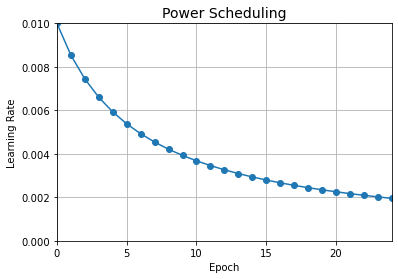

In [62]:
plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [63]:
# 지수 기반 스케일링
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 **(epoch/20)

In [64]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return 0.01 * 0.1 **(epoch/20)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0 = 0.01, s = 20)

In [65]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

In [66]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy,
             optimizer = 'nadam',
             metrics = ['accuracy'])
n_epochs = 25

In [67]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(x_train_scaled, y_train, epochs = n_epochs, validation_data=(x_valid_scaled, y_valid), callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 4s 68us/sample - loss: 0.8464 - accuracy: 0.7589 - val_loss: 0.6881 - val_accuracy: 0.8044
Epoch 2/25
55000/55000 [==============================] - 3s 59us/sample - loss: 0.6563 - accuracy: 0.8022 - val_loss: 0.6128 - val_accuracy: 0.8168
Epoch 3/25
55000/55000 [==============================] - 3s 59us/sample - loss: 0.5846 - accuracy: 0.8205 - val_loss: 0.5814 - val_accuracy: 0.7914
Epoch 4/25
55000/55000 [==============================] - 3s 59us/sample - loss: 0.5370 - accuracy: 0.8341 - val_loss: 0.5250 - val_accuracy: 0.8486
Epoch 5/25
55000/55000 [==============================] - 3s 60us/sample - loss: 0.4747 - accuracy: 0.8525 - val_loss: 0.6173 - val_accuracy: 0.8010
Epoch 6/25
55000/55000 [==============================] - 3s 60us/sample - loss: 0.4422 - accuracy: 0.8607 - val_loss: 0.4674 - val_accuracy: 0.8684
Epoch 7/25
55000/55000 [==============================] -

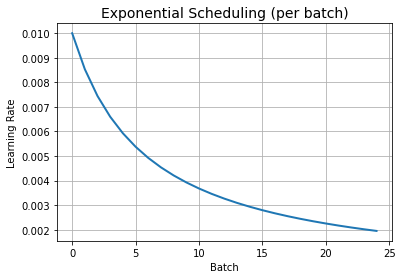

In [71]:
plt.plot(epochs, lrs, "-", linewidth=2)
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

## 규제를 사용해 과대적합 피하기

In [72]:
# l1과 l2 규제
layer = keras.layers.Dense(100, activation='elu', 
                           kernel_initializer='he_normal', 
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [73]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation ='elu',
                      kernel_initializer='he_normal',
                      kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation ='elu',
                      kernel_initializer='he_normal',
                      kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(300, activation ='softmax',
                      kernel_regularizer=keras.regularizers.l2(0.01)),
])

In [74]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy,
             optimizer = keras.optimizers.Nadam(),
             metrics = [keras.metrics.sparse_categorical_accuracy])

In [75]:
history = model.fit(x_train_scaled, y_train, epochs=2, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 5s 86us/sample - loss: 1.4536 - sparse_categorical_accuracy: 0.8043 - val_loss: 0.8336 - val_sparse_categorical_accuracy: 0.7860
Epoch 2/2
55000/55000 [==============================] - 4s 76us/sample - loss: 0.7543 - sparse_categorical_accuracy: 0.8244 - val_loss: 0.7283 - val_sparse_categorical_accuracy: 0.8354


In [76]:
# Code Refactoring
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                          activation='elu',
                          kernel_initializer = 'he_normal',
                          kernel_regularizer = keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation='softmax', kernel_initializer='glorot_uniform')
])

In [77]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy,
             optimizer = keras.optimizers.Nadam(),
             metrics = [keras.metrics.sparse_categorical_accuracy])

In [78]:
history = model.fit(x_train_scaled, y_train, epochs=2, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 4s 77us/sample - loss: 1.6002 - sparse_categorical_accuracy: 0.8123 - val_loss: 0.7244 - val_sparse_categorical_accuracy: 0.8302
Epoch 2/2
55000/55000 [==============================] - 4s 68us/sample - loss: 0.7185 - sparse_categorical_accuracy: 0.8282 - val_loss: 0.7158 - val_sparse_categorical_accuracy: 0.8258


## DropOut

In [79]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [80]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy,
             optimizer = keras.optimizers.Nadam(),
             metrics = [keras.metrics.sparse_categorical_accuracy])

In [81]:
history = model.fit(x_train_scaled, y_train, epochs =2 , validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 5s 83us/sample - loss: 0.5723 - sparse_categorical_accuracy: 0.8025 - val_loss: 0.3798 - val_sparse_categorical_accuracy: 0.8570
Epoch 2/2
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4252 - sparse_categorical_accuracy: 0.8450 - val_loss: 0.3457 - val_sparse_categorical_accuracy: 0.8690


In [82]:
# SELU base dropout
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(0.2),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.AlphaDropout(0.2),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.AlphaDropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])
optimizer = keras.optimizers.SGD(lr = 0.01, momentum=0.9, nesterov=True)

In [83]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy,
             optimizer =optimizer,
             metrics = [keras.metrics.sparse_categorical_accuracy])

In [84]:
history = model.fit(x_train_scaled, y_train, epochs =2 , validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 3s 64us/sample - loss: 0.6578 - sparse_categorical_accuracy: 0.7589 - val_loss: 0.6375 - val_sparse_categorical_accuracy: 0.8308
Epoch 2/2
55000/55000 [==============================] - 3s 55us/sample - loss: 0.5532 - sparse_categorical_accuracy: 0.7973 - val_loss: 0.5928 - val_sparse_categorical_accuracy: 0.8410


In [85]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 0s 19us/sample - loss: 0.6596 - sparse_categorical_accuracy: 0.8255


[0.6596381865978241, 0.8255]

In [86]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 0s 19us/sample - loss: 0.6596 - sparse_categorical_accuracy: 0.8255


[0.6596381865978241, 0.8255]

In [87]:
history = model.fit(x_train_scaled, y_train)

Train on 55000 samples
55000/55000 [==============================] - 3s 53us/sample - loss: 0.5284 - sparse_categorical_accuracy: 0.8039


## Monete Carlo dropout

In [88]:
y_probas = np.stack([model(x_test_scaled, training=True) for sample in range(100)])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [89]:
y_proba = y_probas.mean(axis=0)

In [90]:
y_std = y_probas.std(axis = 0)

In [91]:
np.round(model.predict(x_test_scaled[:1]), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.07, 0.  , 0.8 ]],
      dtype=float32)

In [92]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.42, 0.  , 0.05, 0.01, 0.53]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.66, 0.  , 0.19, 0.  , 0.15]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.12, 0.  , 0.81]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.84, 0.  , 0.01, 0.  , 0.15]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.5 , 0.  , 0.44]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.23, 0.  , 0.72]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.  , 0.04, 0.  , 0.8 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.18, 0.  , 0.76]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.35, 0.  , 0.33, 0.  , 0.32]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.32, 0.  , 0.15, 0.  , 0.53]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.02, 0.02, 0.88]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.53, 0.  , 0.35, 0.  , 0.13]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.4 , 0.  , 0.54]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.54, 0.  , 0

In [93]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.37, 0.01, 0.24, 0.01, 0.38]],
      dtype=float32)

In [94]:
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.01, 0.27, 0.04, 0.21, 0.03, 0.25]],
      dtype=float32)

In [95]:
y_pred = np.argmax(y_proba, axis=1)
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8424

In [96]:
# BatchNormalization 층과 같은 층을 가지고 있으면 훈련 모드를 강제로 설정하면 안됨.
# 대신 dropout 층 아래와 같은 클래스를 작성하여 변경할 것
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training =True)
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [97]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [98]:
mc_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_249 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_250 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_251 (Dense)            (None, 10)              

In [99]:
optimizer = keras.optimizers.SGD(lr =0.01, momentum=0.9, nesterov=True)

In [100]:
mc_model.compile( loss = keras.losses.sparse_categorical_crossentropy,
                optimizer = optimizer,
                metrics = [keras.metrics.sparse_categorical_accuracy])

In [101]:
mc_model.set_weights(model.get_weights())

In [102]:
# 윗 단계를 해야 mcDropout을 사용 할 수 있음.
np.round(np.mean([mc_model.predict(x_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.39, 0.  , 0.22, 0.01, 0.37]],
      dtype=float32)

## MAX-Norm 규제

In [103]:
layer = keras.layers.Dense(100, activation='elu', 
                           kernel_initializer='he_normal', 
                           kernel_constraint=keras.constraints.max_norm(1.))

In [104]:
MaxNormDense = partial(keras.layers.Dense,
                      activation = 'selu', kernel_initializer='lecun_normal',
                      kernel_constraint = keras.constraints.max_norm(1.))

In [105]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation='softmax')
])

In [106]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy,
             optimizer = keras.optimizers.Nadam(),
             metrics = [keras.metrics.sparse_categorical_accuracy])

In [108]:
history = model.fit(x_train_scaled, y_train, epochs = 10, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 71us/sample - loss: 0.3296 - sparse_categorical_accuracy: 0.8779 - val_loss: 0.3365 - val_sparse_categorical_accuracy: 0.8780
Epoch 2/10
55000/55000 [==============================] - 4s 71us/sample - loss: 0.3178 - sparse_categorical_accuracy: 0.8817 - val_loss: 0.3460 - val_sparse_categorical_accuracy: 0.8776
Epoch 3/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.3115 - sparse_categorical_accuracy: 0.8836 - val_loss: 0.3453 - val_sparse_categorical_accuracy: 0.8752
Epoch 4/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.3063 - sparse_categorical_accuracy: 0.8858 - val_loss: 0.3665 - val_sparse_categorical_accuracy: 0.8698
Epoch 5/10
55000/55000 [==============================] - 4s 79us/sample - loss: 0.3072 - sparse_categorical_accuracy: 0.8863 - val_loss: 0.3368 - val_sparse_categorical_accuracy: 0.8786
Epoch 6/10
55000